In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Concept-and-Technology-of-AI-/bank .csv")
df.info() #Checking info of database
object_columns = df.select_dtypes(include='object').columns #Gives only data type for object
print("\nColumns with dtypes=object:")
print(object_columns)
unique_values = {col: df[col].unique() for col in object_columns} # For printing unique values of the columns
for col, values in unique_values.items():
  print(f"Unique values in '{col}': {values}")
null_values = df.isnull().sum() # Checking the numbers of how many null value are there
print("Null values in each column:")
print(null_values)
df_numeric = df.select_dtypes(exclude=['object']) # Dropping all object with dtype
df_numeric.to_csv("banknumericdata.csv", index=False) # Saving the data into new csv file
print(df_numeric.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Columns with dtypes=object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'c

Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [6]:
import pandas as pd
import numpy as np

# Step 1: Load your dataset from a CSV file
file_path = "/content/drive/MyDrive/Concept-and-Technology-of-AI-/medical_students_dataset.csv"  # Replace this with the actual path to your dataset
iris_df = pd.read_csv(file_path)

# Check for initial data overview
print("Initial Dataset Overview:")
print(iris_df.head())

# Adding missing values (optional, for demonstration purposes)
np.random.seed(42)
mask = np.random.rand(*iris_df.shape) < 0.1  # 10% missing
iris_df[mask] = np.nan

print("\nMissing Values in Dataset Before Handling:")
print(iris_df.isnull().sum())

# Step 2: Handle missing values
for column in iris_df.columns:
    if iris_df[column].dtype == 'float64' or iris_df[column].dtype == 'int64':  # Numeric column
        # Fill with median
        median_value = iris_df[column].median()
        iris_df[column].fillna(median_value, inplace=True)
        print(f"Filled missing values in '{column}' with median: {median_value}")
    elif iris_df[column].dtype == 'object':  # Categorical column
        # Fill with mode
        mode_value = iris_df[column].mode()[0]
        iris_df[column].fillna(mode_value, inplace=True)
        print(f"Filled missing values in '{column}' with mode: {mode_value}")

print("\nMissing Values in Dataset After Handling:")
print(iris_df.isnull().sum())

# Step 3: Check for duplicate rows
duplicate_count = iris_df.duplicated().sum()
print(f"\nNumber of duplicate rows in the dataset: {duplicate_count}")

# Step 4: Handle duplicate rows
if duplicate_count > 0:
    iris_df = iris_df.drop_duplicates()
    print("\nDuplicates removed. Updated DataFrame info:")
    print(iris_df.info())

# Step 5: Output the cleaned DataFrame
output_file = "cleaned_dataset.csv"
iris_df.to_csv(output_file, index=False)
print(f"\nCleaned dataset saved as '{output_file}'.")


Initial Dataset Overview:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  

Missing Values in Dataset Before Handling:
Student ID        37850

<ipython-input-6-15d809ab265c>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris_df[column].fillna(median_value, inplace=True)
<ipython-input-6-15d809ab265c>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Filled missing values in 'Height' with median: 174.91561183275553
Filled missing values in 'Weight' with median: 70.0442765702329
Filled missing values in 'Blood Type' with mode: B
Filled missing values in 'BMI' with median: 22.67775797570992
Filled missing values in 'Temperature' with median: 98.59958489577186
Filled missing values in 'Heart Rate' with median: 80.0
Filled missing values in 'Blood Pressure' with median: 115.0
Filled missing values in 'Cholesterol' with median: 184.0
Filled missing values in 'Diabetes' with mode: No
Filled missing values in 'Smoking' with mode: No

Missing Values in Dataset After Handling:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

Number of duplicate rows in the dataset: 2387

Duplicates removed. Updated DataFrame info:
<clas

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

Number of null values in the 'Age' column: 177
Number of null values in the 'Age' column after dropping: 0

Updated DataFrame after processing:
                                                Name  Pclass     Sex   Age  \
0                            Braund, Mr. Owen Harris       3    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                             Heikkinen, Miss. Laina       3  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                           Allen, Mr. William Henry       3    male  35.0   

      Fare  Survived  Embarked_C  Embarked_Q  Embarked_S  
0   7.2500         0       False       False        True  
1  71.2833         1        True       False       False  
2   7.9250         1       False       False        True  
3  53.1000         1       False       False        True  
4   8.0500         0       False       False        True  

Processed data saved to 'process

<ipython-input-12-94989eeb86c4>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_survival_rates.index, y=mean_survival_rates.values, palette="pastel")


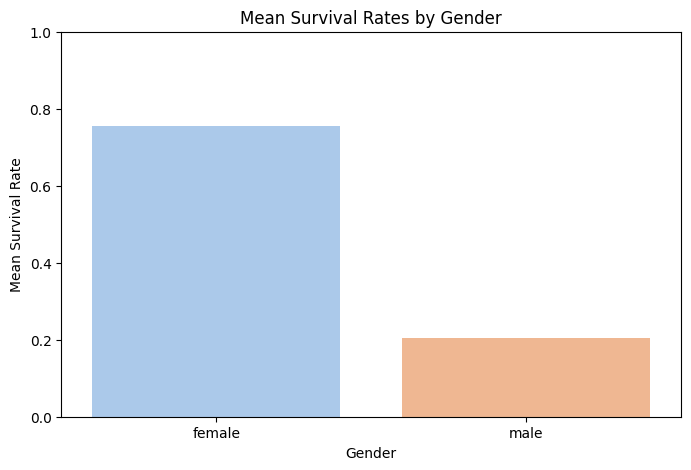

<Figure size 1000x600 with 0 Axes>

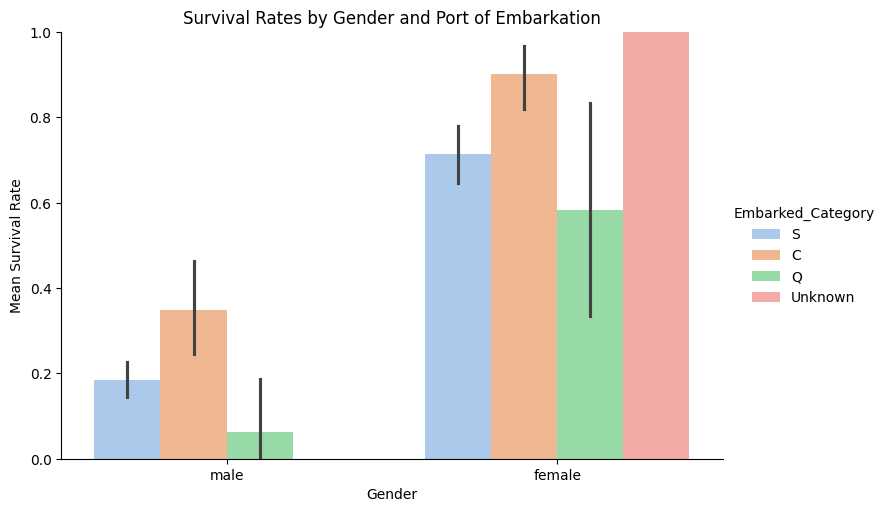

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "/content/drive/MyDrive/Concept-and-Technology-of-AI-/Titanic-Dataset.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Step 2: Subset DataFrame for specific columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived', 'Embarked']]

# Step 3: Count and drop null values in the 'Age' column
null_count = subset_df['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column: {null_count}")
subset_df = subset_df.dropna(subset=['Age'])  # Drop rows where 'Age' is null
print(f"Number of null values in the 'Age' column after dropping: {subset_df['Age'].isnull().sum()}")

# Step 4: Apply one-hot encoding to the 'Embarked' column
# Ensure 'Embarked' column has valid data before encoding
if 'Embarked' in subset_df.columns:
    encoded_df = pd.get_dummies(subset_df['Embarked'], prefix='Embarked')  # One-hot encode 'Embarked'
    subset_df = pd.concat([subset_df, encoded_df], axis=1)  # Add encoded columns to the DataFrame
    subset_df.drop(columns=['Embarked'], inplace=True)  # Drop the original 'Embarked' column
else:
    print("Warning: 'Embarked' column not found. Skipping one-hot encoding.")

# Step 5: Verify changes
print("\nUpdated DataFrame after processing:")
print(subset_df.head())

# Step 6: Save the cleaned and updated DataFrame
output_file = "processed_titanic_data.csv"
subset_df.to_csv(output_file, index=False)
print(f"\nProcessed data saved to '{output_file}'.")

# Step 1: Load the dataset
file_path = "processed_titanic_data.csv"  # Replace with the processed file path
df = pd.read_csv(file_path)

# Step 2: Problem 4 - Calculate and Compare Mean Survival Rates by Gender
mean_survival_rates = df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(mean_survival_rates)

# Visualization: Mean Survival Rates by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x=mean_survival_rates.index, y=mean_survival_rates.values, palette="pastel")
plt.title("Mean Survival Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Survival Rate")
plt.ylim(0, 1)
plt.show()

# Step 3: Problem 5 - Decode 'Embarked' columns and compare survival rates by Gender and Port of Embarkation
# Decode one-hot encoding for 'Embarked' (C, Q, S)
if {'Embarked_C', 'Embarked_Q', 'Embarked_S'}.issubset(df.columns):
    def decode_embarked(row):
        if row['Embarked_C'] == 1: return 'C'
        if row['Embarked_Q'] == 1: return 'Q'
        if row['Embarked_S'] == 1: return 'S'
        return 'Unknown'

    df['Embarked_Category'] = df.apply(decode_embarked, axis=1)

# Visualization: Survival Rates by Gender and Port of Embarkation
plt.figure(figsize=(10, 6))
sns.catplot(
    x="Sex", hue="Embarked_Category", y="Survived",
    data=df, kind="bar", height=5, aspect=1.5, palette="pastel"
)
plt.title("Survival Rates by Gender and Port of Embarkation")
plt.xlabel("Gender")
plt.ylabel("Mean Survival Rate")
plt.ylim(0, 1)
plt.show()

